## Imports

In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

## Importing Dataset

In [82]:
fake = pd.read_csv("datasets/Fake.csv")

fake


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [83]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [84]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

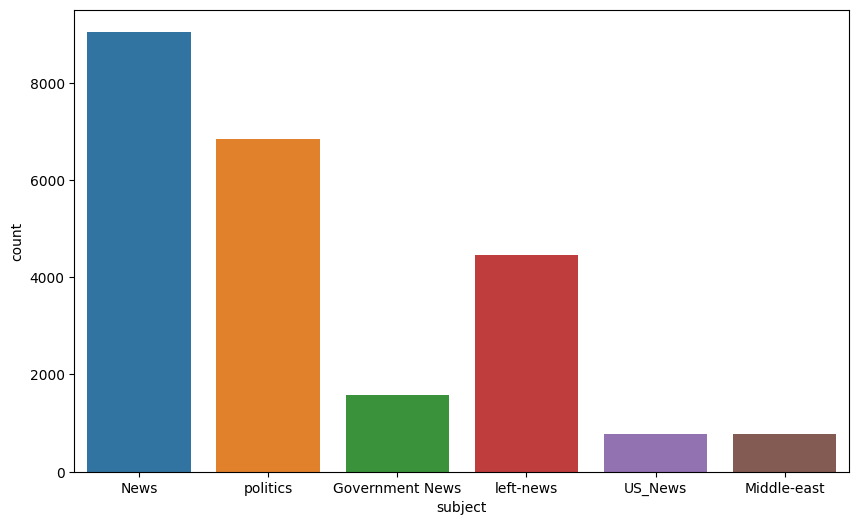

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

## Using WordCloud

here i am just joining all the text data with a space inorder to use wordCloud

In [86]:
textfake = ' '.join(fake['text'].tolist())

In [87]:
wordcloud = WordCloud(width=1920,height=1080).generate(textfake)

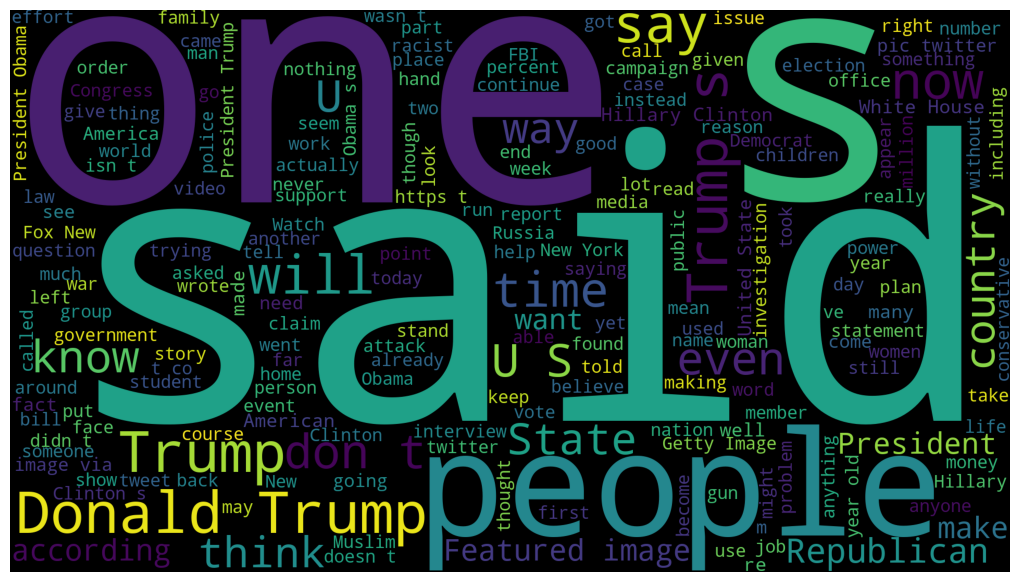

In [88]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Exploring with Real news

In [89]:
real = pd.read_csv("datasets/True.csv")
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [90]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [91]:
real['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

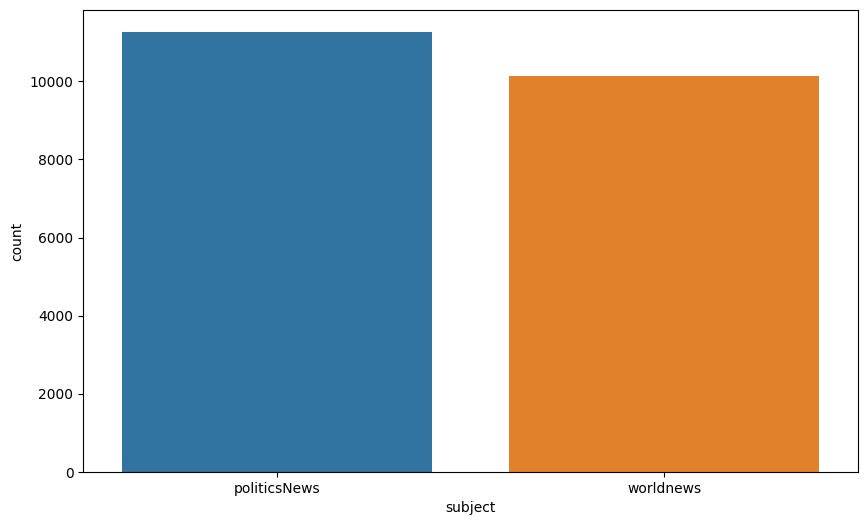

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=real)

In [93]:
textreal = ' '.join(real['text'].tolist())

In [94]:
wordcloudreal = WordCloud(width=1920,height=1080).generate(textreal)

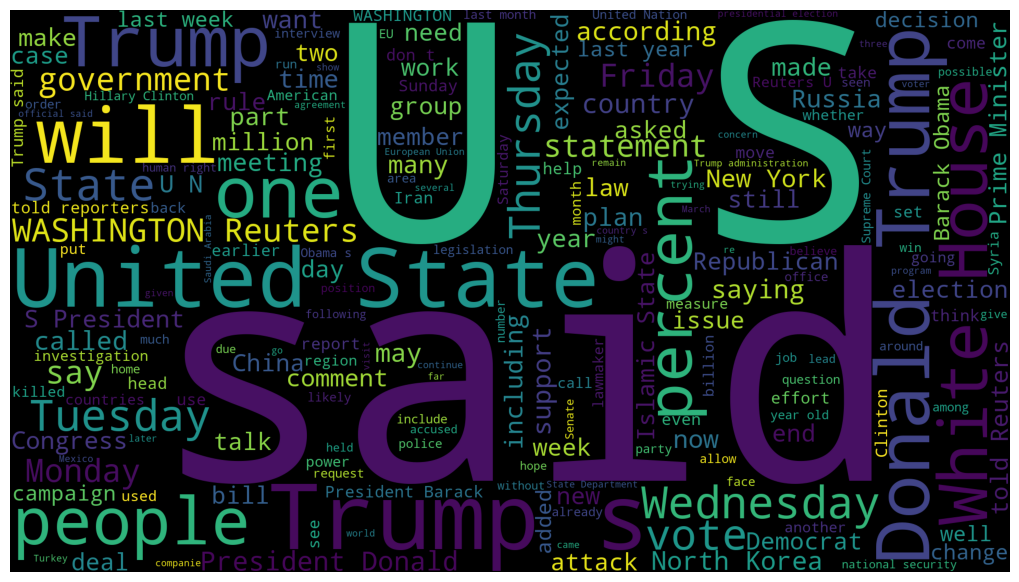

In [95]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloudreal)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Difference in Text

Real news seems to have source of publication which is not present in fake news set

Looking at the data:
<ul>
    <li>most of text contains reuters information</li>
    <li>Some text are tweets from Twitter</li>
    <li>Few text do not contain any publication info</li>
</ul>

## Cleaning Data

Removing Reuters or Twitter Tweet information from the text

<ul>
    <li>Text can be splitted only once at "-" which is always present after mentioning source of publication,this gives us publication part and text part</li>
    <li>If we do not get text part,this means publication details wasn't given for that record</li>
    <li>The Twitter tweets always have the same source,a long text of max 259 characters</li>
</ul>

In [96]:
real.sample(5)

,title,text,subject,date
4636,Tillerson to press NATO on defense spending: o...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"March 28, 2017"
10133,Trump campaign manager charged with misdemeano...,(Reuters) - Donald Trump’s presidential campai...,politicsNews,"March 29, 2016"
18489,Russian firm provides new internet connection ...,(Reuters) - North Korea has opened a second in...,worldnews,"October 2, 2017"
17613,Romania's ruling party endorses government res...,BUCHAREST (Reuters) - Romania s ruling Social ...,worldnews,"October 12, 2017"
21232,Several wounded after blast hits bus in Turkey...,ANKARA (Reuters) - Seven people were wounded w...,worldnews,"August 31, 2017"


In [97]:
unknown_publishers = []

for index,row in enumerate(real.text.values):
    try:
        record = row.split("-",maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

len(unknown_publishers)

222

In [98]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

here in the data there are some text values with empty cells which can potentially reduce the accuracy so we need to remove those

In [99]:
real['text'].replace(' ', np.nan,inplace=True)
real= real.dropna(subset=['text'])

In [100]:
real.iloc[8970]

title      Milestones in legal fight over Texas abortion law
text       (Reuters) - The U.S. Supreme Court is set to r...
subject                                         politicsNews
date                                          June 26, 2016 
Name: 8971, dtype: object

In [101]:
publisher = []

tmp_text = []

for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append("Unknown")
        continue
    else:
        record = row.split("-",maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

len(publisher)

21416

In [102]:
real['publisher'] = publisher
real['text'] = tmp_text

C:\Users\rrajn\AppData\Local\Temp\ipykernel_12572\393858622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['publisher'] = publisher
C:\Users\rrajn\AppData\Local\Temp\ipykernel_12572\393858622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = tmp_text


In [103]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [104]:
real.shape

(21416, 5)

In [105]:
[index for index,text in enumerate(real.text.tolist()) if str(text).strip() == ""]

[]

here we can see that there are no empty cells in real news dataset.Same way we need to check that in the fake news dataset

In [106]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [107]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [108]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

C:\Users\rrajn\AppData\Local\Temp\ipykernel_12572\2594370826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['title'] + " " + real['text']


In [109]:
real['text'] = real['text'].apply(lambda x:str(x).lower())

fake['text'] = fake['text'].apply(lambda x:str(x).lower())

C:\Users\rrajn\AppData\Local\Temp\ipykernel_12572\15813713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['text'].apply(lambda x:str(x).lower())


## Preprocessing Text

In [110]:
real['class'] = 1
fake['class'] = 0

C:\Users\rrajn\AppData\Local\Temp\ipykernel_12572\3006211912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['class'] = 1


now we are going to combine both real and fake datasets

In [111]:
real = real[['text','class']]
real

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
21412,'fully committed' nato backs new u.s. approach...,1
21413,lexisnexis withdrew two products from chinese ...,1
21414,minsk cultural hub becomes haven from authorit...,1
21415,vatican upbeat on possibility of pope francis ...,1


In [112]:
fake = fake[['text','class']]
fake

,text,class
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0
...,...,...
23476,mcpain: john mccain furious that iran treated ...,0
23477,justice? yahoo settles e-mail privacy class-ac...,0
23478,sunnistan: us and allied ‘safe zone’ plan to t...,0
23479,how to blow $700 million: al jazeera america f...,0


In [113]:
data = pd.concat([real,fake],ignore_index=True)
data

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
44892,mcpain: john mccain furious that iran treated ...,0
44893,justice? yahoo settles e-mail privacy class-ac...,0
44894,sunnistan: us and allied ‘safe zone’ plan to t...,0
44895,how to blow $700 million: al jazeera america f...,0


In [114]:
data.sample(5)

,text,class
12951,egypt's sisi discusses repercussions of u.s. e...,1
41496,comrades in liberal mi college town filled wit...,0
1113,u.s. house to vote on non-nuclear iran sanctio...,1
30943,haha! watch dnc chair perez try to dodge quest...,0
7865,father of u.s. war hero attacks trump's commen...,1


install the libaries


pip install spacy<br >
python -m spacy download en_core_web_sm<br>
pip install beautifulsoup4<br>
pip install textblob

In [124]:
import preprocessing as ps

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (c:\Users\rrajn\AppData\Local\Programs\Python\Python311\Lib\site-packages\typing_extensions.py)

In [ ]:
data['text'].apply(lambda x: ps.re)